In [18]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf

In [19]:
dataset = pd.read_csv("statlog+german+credit+data/german.data",header=None,delim_whitespace=True)
dataset.loc

C:\Users\acer\AppData\Local\Temp\ipykernel_23296\2670205334.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataset = pd.read_csv("statlog+german+credit+data/german.data",header=None,delim_whitespace=True)


In [20]:
dataset.loc[(dataset[3] == "A48") | (dataset[3] == "A44") | (dataset[3] == "A45"),3] = "A410"
dataset.loc[dataset[8] == "A94", 8] = "A91"

In [21]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

categories = [
    ["A11","A12","A13","A14"] ,
    ["A34","A33","A32","A31","A30"] ,
    ["A65","A61","A62","A63","A64"] ,
    ["A71","A72","A73","A74","A75"] ,
    ["A101","A102","A103"] ,
    ["A124","A123","A122","A121"] ,
    ["A141","A142","A143"] ,
    ["A151","A152","A153"] ,
    ["A171","A172","A173","A174"]
]

le = LabelEncoder()
dataset.loc[:,18] = le.fit_transform(dataset.loc[:,18])
dataset.loc[:,19] = le.fit_transform(dataset.loc[:,19])


In [22]:
col_trans = ColumnTransformer(
    transformers=[
        ('ordinal',OrdinalEncoder(categories=categories),[0, 2, 5, 6, 9, 11, 13, 14, 16]) ,
        ('encoder',OneHotEncoder(),[3,8])
    ] , 
    remainder='passthrough'
)
dataset = col_trans.fit_transform(dataset)

no_columns = len(col_trans.named_transformers_['encoder'].get_feature_names_out())
print(no_columns)

dataset = pd.DataFrame(dataset)
dataset = dataset.astype(int)

10


In [23]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [24]:
y[y == 2] = 0

In [25]:
y

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [26]:
def train_predict_linear(x_train,y_train,x_test):
    from sklearn.linear_model import LogisticRegression

    classifier = LogisticRegression()
    classifier.fit(x_train, y_train)

    return classifier.predict(x_test)

def train_predict_tree(x_train, y_train, x_test, type="decision"):
    if type=="decision" or type=="d" :
        from sklearn.tree import DecisionTreeClassifier

        tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
        tree.fit(x_train, y_train)
    elif type=="random" or type=="r" :
        from sklearn.ensemble import RandomForestClassifier

        tree = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
        tree.fit(x_train, y_train)
        
    return tree.predict(x_test)

def train_ann(x_train, y_train, x_test, hidden_units=6, phs=100):

    ann = tf.keras.models.Sequential()

    ann.add(tf.keras.layers.Dense(units=hidden_units, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=hidden_units, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=hidden_units, activation='relu'))

    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    ann.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])
    ann.fit(x_train, y_train, batch_size=40, epochs=phs)

    return ann.predict(x_test)

def train_naive_bayes(x_train, y_train, x_test):
    from sklearn.naive_bayes import GaussianNB

    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    
    return classifier.predict(x_test)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
def show_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)

    # ✅ Precision, Recall, F1
    precision = precision_score(y_test, y_pred, average="weighted")  
    recall = recall_score(y_test, y_pred, average="weighted")  
    f1 = f1_score(y_test, y_pred, average="weighted")

    # ✅ ROC-AUC (needs binary or one-vs-rest for multi-class)
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    y_pred_binarized = lb.transform(y_pred)

    roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average="weighted")

    # ✅ Print results
    print("Model Performance Metrics:")
    print(f"Accuracy   : {accuracy:.4f}")
    print(f"Precision  : {precision:.4f}")
    print(f"Recall     : {recall:.4f}")
    print(f"F1-Score   : {f1:.4f}")
    print(f"ROC-AUC    : {roc_auc:.4f}")

    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    return accuracy , precision , recall , f1 , roc_auc


Model Performance Metrics:
Accuracy   : 0.7750
Precision  : 0.7633
Recall     : 0.7750
F1-Score   : 0.7625
ROC-AUC    : 0.6876


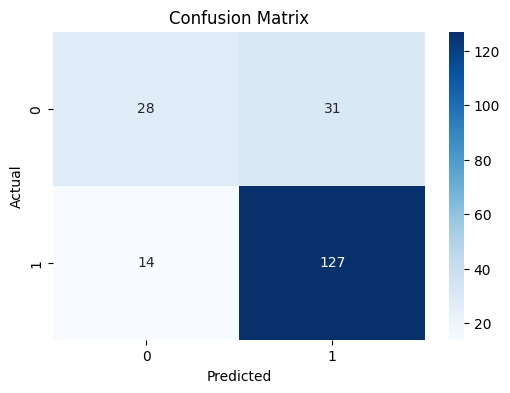

In [30]:
y_pred = train_predict_linear(x_train, y_train, x_test)

lr_accuracy ,lr_precision ,lr_recall ,lr_f1 ,lr_roc_auc = show_metrics(y_test,y_pred)

Model Performance Metrics:
Accuracy   : 0.7200
Precision  : 0.7385
Recall     : 0.7200
F1-Score   : 0.7267
ROC-AUC    : 0.6930


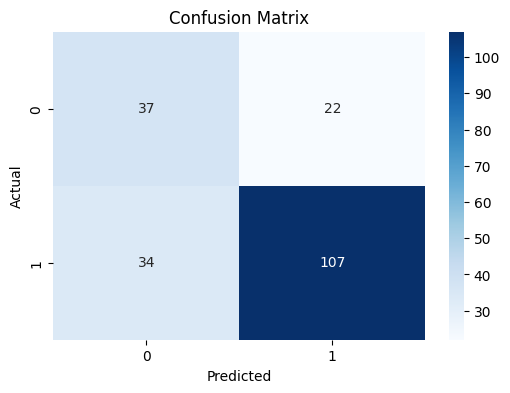

In [31]:
y_pred = train_naive_bayes(x_train, y_train, x_test)

nvb_accuracy ,nvb_precision ,nvb_recall ,nvb_f1 ,nvb_roc_auc = show_metrics(y_test,y_pred)

Model Performance Metrics:
Accuracy   : 0.8150
Precision  : 0.8137
Recall     : 0.8150
F1-Score   : 0.7996
ROC-AUC    : 0.7209


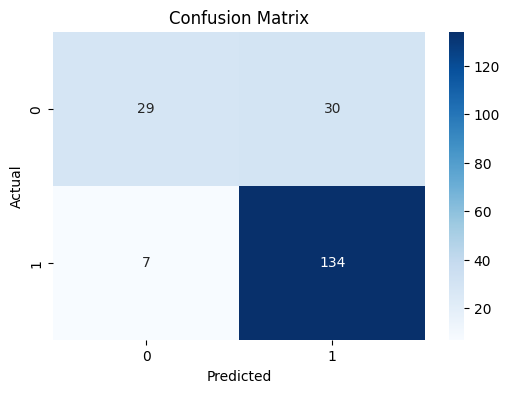

In [32]:
y_pred = train_predict_tree(x_train, y_train, x_test, type='r')

tr_accuracy ,tr_precision ,tr_recall ,tr_f1 ,tr_roc_auc = show_metrics(y_test,y_pred)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2999 - loss: 0.9390
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3243 - loss: 0.7959 
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4645 - loss: 0.7255 
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5633 - loss: 0.6859 
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6430 - loss: 0.6608 
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7197 - loss: 0.6320 
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7141 - loss: 0.6189 
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7071 - loss: 0.6033 
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7402 - loss: 0.5770 
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6948 - loss: 0.5923 
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7209 - loss: 0.5536 
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

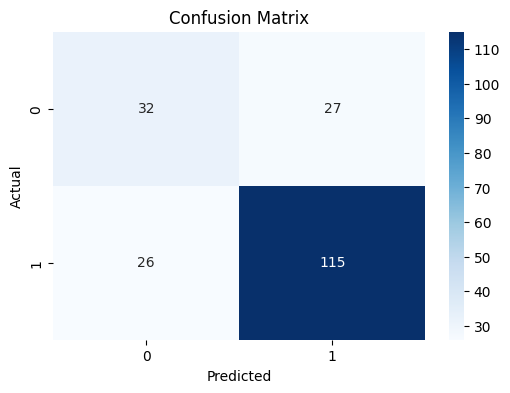

In [33]:
y_pred = train_ann(x_train, y_train, x_test, 11, 100)

y_pred = y_pred > 0.5
y_pred = y_pred.astype('int')
y_test = y_test.reshape(200,1)

an_accuracy ,an_precision ,an_recall ,an_f1, an_roc_auc = show_metrics(y_test,y_pred)

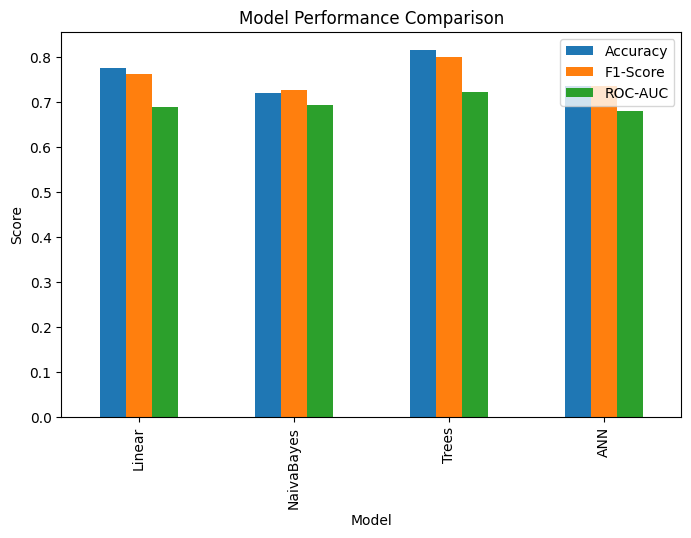

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

results = {
    "Model": ["Linear", "NaivaBayes", "Trees", "ANN"],
    "Accuracy": [lr_accuracy, nvb_accuracy, tr_accuracy, an_accuracy],
    "F1-Score": [lr_f1, nvb_f1, tr_f1, an_f1],
    "ROC-AUC": [lr_roc_auc, nvb_roc_auc, tr_roc_auc, an_roc_auc]
}

df = pd.DataFrame(results)
df.set_index("Model").plot(kind="bar", figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()
